No handles with labels found to put in legend.


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

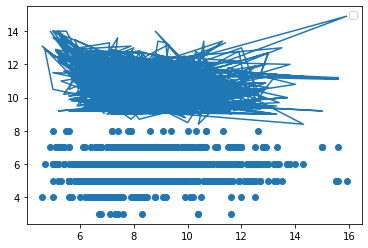

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
wine = pd.read_csv("winequality-red.csv", sep=";")
wine.head(5)
print(wine.head(5))


#plt.plot(wine.density, wine.pH)
#plt.plot(wine[["density"]], wine[["pH"]])
#plt.plot(wine["density"], wine["pH"])

# plotオブジェクトにplot(折れ線)やscatter(散布図)を入れるので、plt.show()とやると重なって出てしまう。そうならないようにfigureがある
plt.plot(wine["fixed acidity"], wine[["alcohol"]])
plt.scatter(wine["fixed acidity"], wine[["quality"]])
plt.legend()
plt.show()

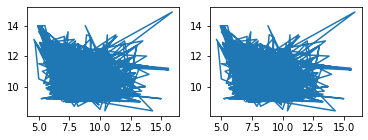

In [57]:
#figureを用いることで複数を表示することができる
plt.figure(figsize=(6, 2))       
plt.subplot(1,2,1)
plt.plot(wine["fixed acidity"], wine[["alcohol"]])
plt.subplot(1,2,2)
plt.plot(wine["fixed acidity"], wine[["alcohol"]])

In [7]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
#X = wine.loc[:, ['density']].as_matrix()
X = wine.loc[:, ['density']].values
 
# 目的変数に "alcohol (アルコール度数)" を利用
#Y = wine['alcohol'].as_matrix()
Y = wine['alcohol'].values

# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

[-280.16382307]
289.67534338256456
0.2461943643971065


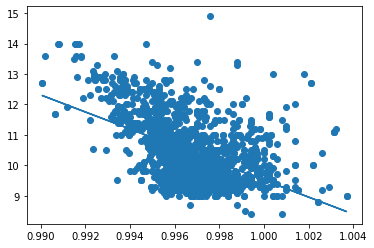

In [32]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X))

# 1つのplotに一緒に表示される。

In [35]:
# 重回帰分析
from sklearn import linear_model
clf1 = linear_model.LinearRegression()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用 → dropで目的変数の列を削除して残りで行列を作成
wine_except_quality = wine.drop("quality", axis=1)
X1 = wine_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y1 = wine['quality'].values
 
# 予測モデルを作成
clf1.fit(X1, Y1)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf1.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf1.intercept_)

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.965208449451552


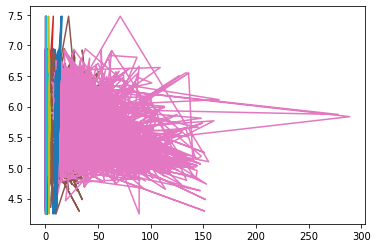

In [60]:
# 回帰直線
# 散布図
plt.plot(X1, clf1.predict(X1))

In [37]:
# 各変数を正規化して重回帰分析
from sklearn import linear_model
clf2 = linear_model.LinearRegression()
 
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine2_except_quality = wine2.drop("quality", axis=1)
X2 = wine2_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y2 = wine2['quality'].values
 
# 予測モデルを作成
clf2.fit(X2, Y2)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf2.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf2.intercept_)

                    Name  Coefficients
2            citric acid      0.036513
3         residual sugar      0.047687
7                density      0.048708
0          fixed acidity      0.056479
5    free sulfur dioxide      0.061931
8                     pH      0.105068
6   total sulfur dioxide      0.184775
4              chlorides      0.224532
9              sulphates      0.306056
1       volatile acidity      0.316408
10               alcohol      0.359057
1.914074291327556e-16


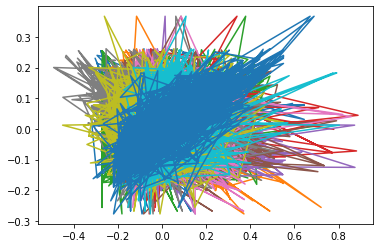

In [39]:
# 回帰直線
plt.plot(X2, clf2.predict(X2))